<h><b>Term Deposit Subscription Prediction</b></h>
<p>Objective:
Predict whether a bank customer will subscribe to a term deposit as a result of a marketing
campaign.</p>


<h><b>Step 1 : Data Loading And PreProcessing</b></h>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import shap
shap.initjs()


In [3]:
df = pd.read_csv("bank-additional-full.csv",sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
df.shape

(41188, 21)

<h><b>Step 2: Performing EDA on The Prepared Dataset</h></b>

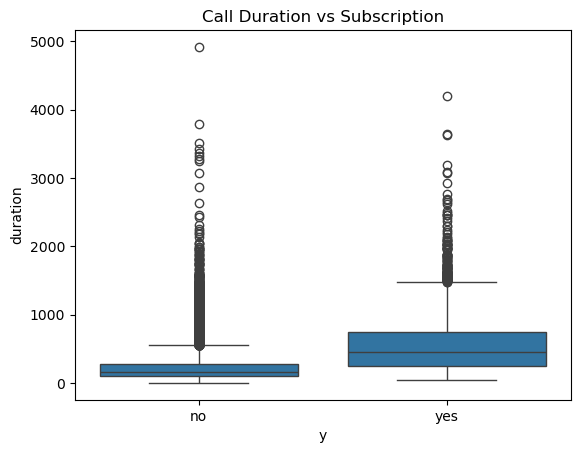

In [10]:
# Boxplot to understand the spread of customer retention in the data 
sns.boxplot(x="y", y="duration", data = df)
plt.title("Call Duration vs Subscription")
plt.show()

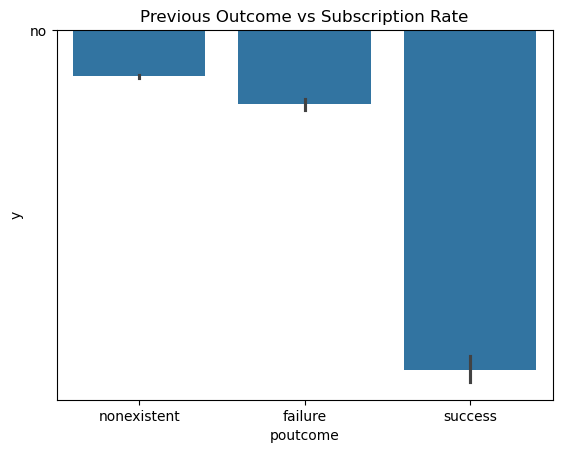

In [9]:
# Plotting barplot to visualize previous outcome and the subscription rates
sns.barplot(x="poutcome", y="y", data=df)
plt.title("Previous Outcome vs Subscription Rate")
plt.show()

<h><b>Now Vizualizing Numerical Features in The Dataset</h></b>

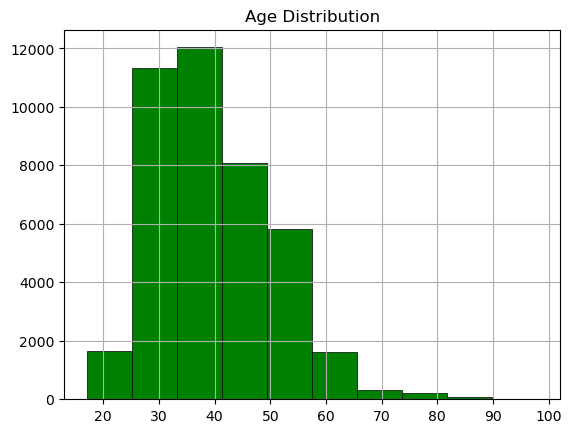

In [10]:
# Histogram defining Age Distribution
df["age"].hist(bins=10,color="green", edgecolor='black', linewidth=0.5)
plt.title("Age Distribution")
plt.show()



<h><b>Now Vizualizing Categorical Features in The Dataset</h></b>

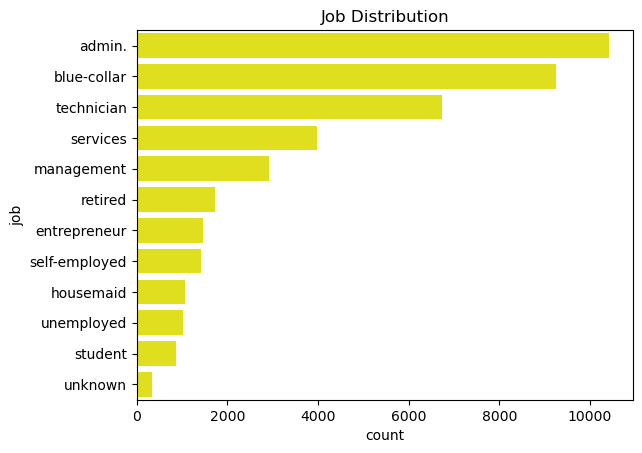

In [11]:
# Job Distribution among subscribers
sns.countplot(y=df["job"], order=df["job"].value_counts().index,color="yellow")
plt.title("Job Distribution")
plt.show()

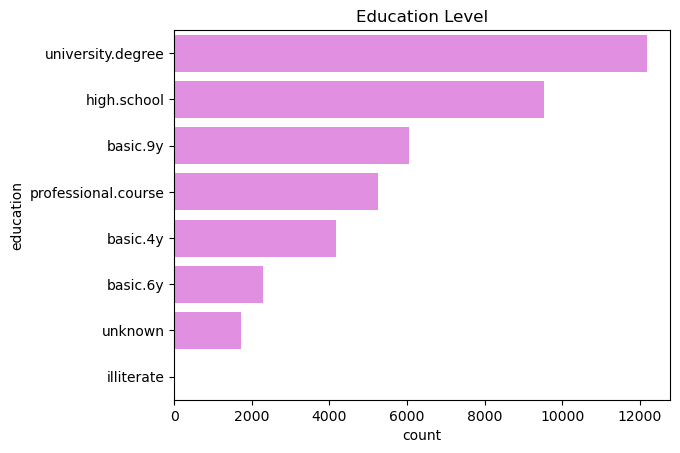

In [12]:
# Level of Education Among the Subscribers 
sns.countplot(y=df["education"], order=df["education"].value_counts().index,color="violet")
plt.title("Education Level")
plt.show()

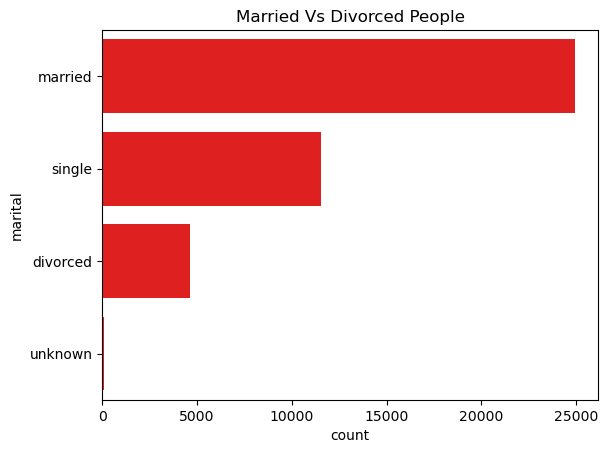

In [13]:
# Countplot to determine marital status of the subscribers
sns.countplot(y=df["marital"], order=df["marital"].value_counts().index,color="red")
plt.title("Married Vs Divorced People")
plt.show()

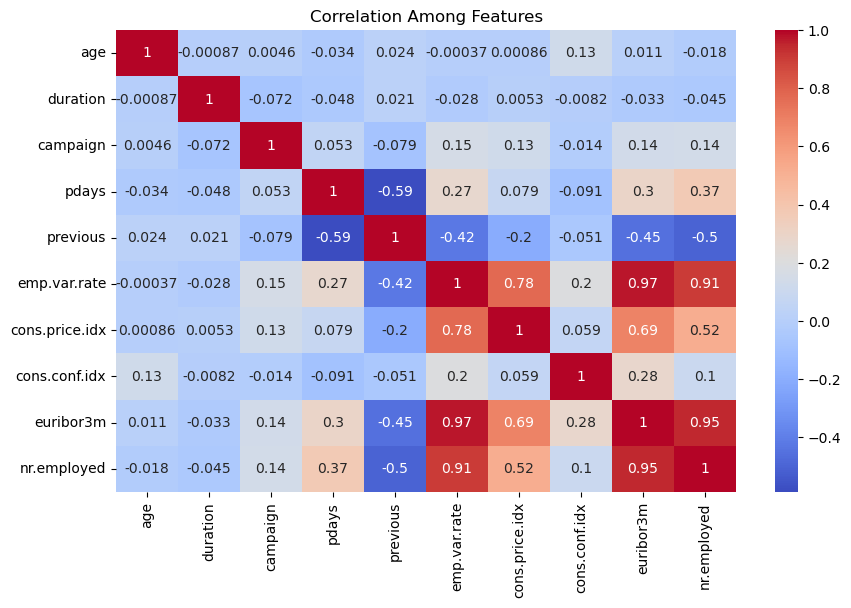

In [14]:
# Heatmap correlation 
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Among Features")
plt.show()

<b>Conclusion:</b>
<li>Most of the target audience are between age 30 and 40</li>
<li>People who are in Admin related field or belonging to blue collar working society mostly are target audience, with a university degree and mostly are married people</li>
<li>Most of the callers have applied or either showed interest in applying for sibscription as boxplot shows that greater the length of a call, more chances are the customer may apply</li>

<h><b>Step 3 : Training & Testing of Data </h></b>

In [11]:
# Separating target variable from rest of the dataset
X = df.drop("y",axis=1)          
y= df["y"].map({"yes":1,"no":0})

# encoding dataset for the model to interpret yes and no as binary values 
X_encoded = pd.get_dummies(X,drop_first=True)

# Preparing data for training and testing 
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,test_size=0.2,random_state=42,stratify=y)

#Applying Standarization of data sing scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



<b><h>Model 1: Logistic Regression</b></h>

In [12]:
# Running Logistic Regression Model 
model = LogisticRegression(max_iter=5000)
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:,1]
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.44      0.54       928

    accuracy                           0.92      8238
   macro avg       0.82      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238

[[7145  165]
 [ 524  404]]
ROC AUC: 0.9424203382235011


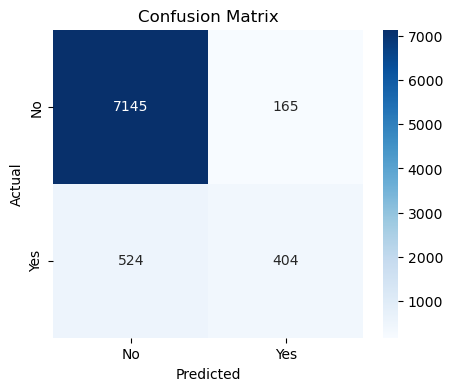

In [17]:
# Preparing Confusion matrix to better visualization 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<b>Conclusion And Analysis of Model 1</b>
<p>Model 1 Results show that there is a strong overall ROC AUC performance with 95% strong discrimination among the class.Meanwhile Model is better at predicting a 0 ( no ) rather than a 1 ( yes ) . With the help of scaling, model was able to perform more better</p>



<h><b>Model 2: Random Forest</h></b>

In [13]:
# Preparing model for random forest 
rf = RandomForestClassifier(n_estimators=200,random_state=42,class_weight="balanced")
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:,1]

# Evaluation
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba_rf))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.70      0.45      0.55       928

    accuracy                           0.92      8238
   macro avg       0.82      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238

[[7130  180]
 [ 507  421]]
ROC AUC: 0.9505530184206803


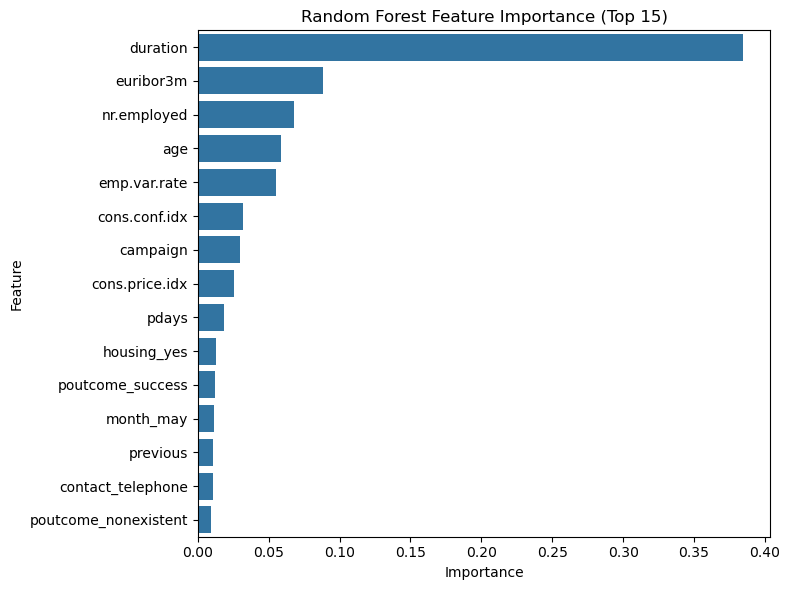

In [21]:
# Determining important features which play important role in deciding customer approval using the Random Forest Model outcome 
importances = rf.feature_importances_
features = X_train.columns

# Updating the dataset 
feat_imp = pd.DataFrame({"Feature": features, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False).head(15)  # top 15

# Displaying Outcome
plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Random Forest Feature Importance (Top 15)")
plt.tight_layout()
plt.show()

<b><h>Conclusion And Analysis of Model 2</b></h>
<p>Slight improvement over Logistic Regression.ROC AUC remained at 94%, indicating strong overall classification performance.</p>
<h><b>Feature Importance:</b></h>
<li>Duration is the most influential feature for predicting yes.</li>
<li>Other top features: Age, Campaign, Emplyement</li>
<b>Interpretation:</b>
<p>Random Forest captures nonlinear relationships and slightly improves precision and F1.
Feature importance gives actionable insights into which features drive predictions.</p>

<b><h>Step 4: Implementing LIME to understand the reasoning behing the outcomes of the model </b></h>

In [2]:
# downloading LIME 
pip install lime


     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     -- ---------------------------------- 20.5/275.7 kB 162.5 kB/s eta 0:00:02
     ---- -------------------------------- 30.7/275.7 kB 187.9 kB/s eta 0:00:02
     ----- ------------------------------- 41.0/275.7 kB 217.9 kB/s eta 0:00:02
     --------- --------------------------- 71.7/275.7 kB 302.7 kB/s eta 0:00:01
     -------------------- --------------- 153.6/275.7 kB 573.4 kB/s eta 0:00:01
     ------------------------------------ 275.7/275.7 kB 944.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283842 sha256=ebe778e2e15043740749a0237afc5f815f14ce598efa561a067289e1d765f01f
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\e7\5d\0e\4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb74

In [20]:
# importing Library
from lime.lime_tabular import LimeTabularExplainer

# to overcome warning, using this function which will wrap the result in a DataFrame and allows prediction to occur  
def predict_fn(x):
    return rf.predict_proba(pd.DataFrame(x, columns=X_train.columns))

explainer = LimeTabularExplainer( training_data=X_train.values, feature_names=X_train.columns, class_names=['No', 'Yes'], mode='classification')
# Initialize LIME
explainer = LimeTabularExplainer(
    training_data=X_train.values,   # using values only 
    feature_names=X_train.columns,  # name of the features 
    class_names=['No', 'Yes'],
    mode='classification'
)

# Picking 5 samples to run a mini model test 
sample_idxs = X_test.sample(5, random_state=42).index

for i in sample_idxs:
   exp = explainer.explain_instance(
    data_row=X_test.iloc[0].values,
    predict_fn=predict_fn
    )
exp.show_in_notebook(show_table=True)


<b><h>Interpretation of LIME Output</b></h>
<p>Using LIME, we explained 5 individual Random Forest predictions.
For instance, one sample had a 95% probability of class = “No”. LIME showed that this decision was mainly driven by Duration of calls
Across the 5 samples, LIME highlighted different combinations of features, confirming that the Random Forest uses multiple factors rather than a single dominant predictor.</p>

<b><h>Results:</b><h>
<li>Both models show strong overall performance (high ROC AUC).</li>

<li>Logistic Regression is interpretable but slightly weaker for predicting positive class.</li>

<li>Random Forest provides better precision and feature importance insights.</li>

<li>The analysis highlights duration as a key factor influencing predictions.</li>
